# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cities[:5]

['qaanaaq', 'thompson', 'mys shmidta', 'sao filipe', 'grindavik']

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "qaanaaq"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=60eb76fa6019086a6cf079fba53baad1&q=qaanaaq'

In [9]:
#sample query for 1 city 
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json


{'coord': {'lon': -69.36, 'lat': 77.48},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 274.79,
  'feels_like': 272.36,
  'temp_min': 274.79,
  'temp_max': 274.79,
  'pressure': 1015,
  'humidity': 86,
  'sea_level': 1015,
  'grnd_level': 1015},
 'wind': {'speed': 0.54, 'deg': 232},
 'clouds': {'all': 0},
 'dt': 1592500406,
 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0},
 'timezone': -10800,
 'id': 3831208,
 'name': 'Qaanaaq',
 'cod': 200}

In [21]:
units = "imperial"
Final_url = f"{url}appid={weather_api_key}&units={units}&q="
lat = []
long= []
temp = []
City =[]
Lat =[]     
Lng =[]
Humidity = []      
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

for city in cities:
    try:
        response = requests.get(Final_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        long.append(response['coord']['lon'])  
        Humidity.append(response['main']['humidity'])      
        Cloudiness.append(response['clouds']['all'])  
        Wind_Speed.append(response['wind']['speed'])  
        Country.append(response['sys']['country'])  
        Date.append(response['dt']) 
        City.append(city)
        print(city)
    except: 
        print("city not found")


qaanaaq
thompson
city not found
sao filipe
grindavik
besikduzu
broome
abu zabad
port alfred
saint-philippe
fairbanks
jamestown
kapaa
narsaq
victoria
camacha
new norfolk
hofn
albany
longyearbyen
severo-kurilsk
norrtalje
grand-santi
opuwo
bintulu
aykhal
puerto ayora
saskylakh
rikitea
tessalit
punta arenas
cape town
city not found
kodiak
belyy yar
kawardha
bandarbeyla
winnemucca
leningradskiy
poshekhonye
katsuura
mataura
city not found
portland
nikolskoye
ushuaia
novyy urengoy
city not found
shaunavon
eyl
vaini
bethel
city not found
atuona
chokurdakh
am timan
codrington
hambantota
saint-ambroise
mount gambier
kiruna
hobyo
kiama
cidreira
city not found
georgetown
butaritari
ploemeur
dikson
blyznyuky
barrow
bowen
lorengau
mersing
maniitsoq
pawayan
mar del plata
kaeo
kailua
hithadhoo
belaya gora
city not found
hobart
dicabisagan
rosario
sitka
inta
city not found
tuktoyaktuk
upernavik
imeni poliny osipenko
khakhea
westport
bahia honda
vao
city not found
vilyuysk
poum
cravo norte
city not foun

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_DF= pd.DataFrame({"cityname":City,"lat":lat,"long":long,"temp":temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind_Speed":Wind_Speed,"Country":Country,"Date":Date})    





In [34]:
weather_DF 

,cityname,lat,long,temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,qaanaaq,77.48,-69.36,35.11,85,0,1.39,GL,1592502877
1,thompson,55.74,-97.86,35.60,93,90,13.87,CA,1592502878
2,sao filipe,14.90,-24.50,82.54,57,0,12.57,CV,1592502772
3,grindavik,63.84,-22.43,50.00,76,75,23.04,IS,1592502700
4,besikduzu,41.05,39.23,75.20,78,75,3.36,TR,1592503101
...,...,...,...,...,...,...,...,...,...
542,naqadeh,36.96,45.39,71.15,28,0,5.75,IR,1592503190
543,luanda,-8.84,13.23,75.20,78,36,8.05,AO,1592503191
544,kemijarvi,66.71,27.43,58.24,92,100,5.37,FI,1592503191
545,vientiane,17.97,102.60,75.06,86,23,3.69,LA,1592502995


In [36]:
weather_DF.to_csv("weathercsv.csv",index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#skiped

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

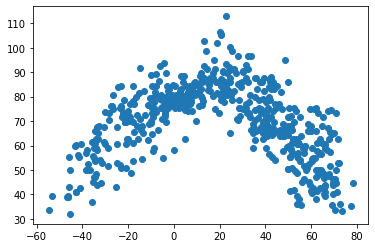

In [50]:
#two that shows the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis.
plt.scatter(weather_DF["lat"],weather_DF["temp"])

## Latitude vs. Humidity Plot

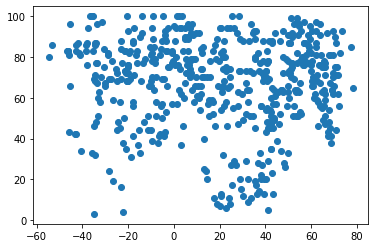

In [51]:
#The further the weather hits between 80-100C y-axis the more humidity exisits. 
plt.scatter(weather_DF["lat"],weather_DF["Humidity"])

## Latitude vs. Cloudiness Plot

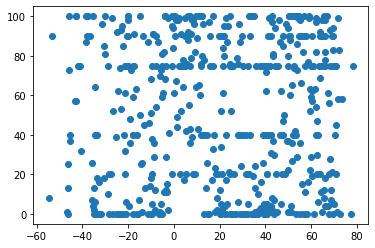

In [52]:
#The exact consistent spot from the plots suggest that between 78-100 is congested with cloudiness. 
plt.scatter(weather_DF["lat"],weather_DF["Cloudiness"])

## Latitude vs. Wind Speed Plot

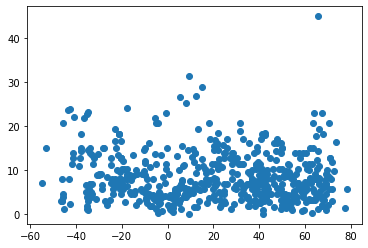

In [53]:
#the wind speed is heavy between 0-10 y-axis
plt.scatter(weather_DF["lat"],weather_DF["Wind_Speed"])

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


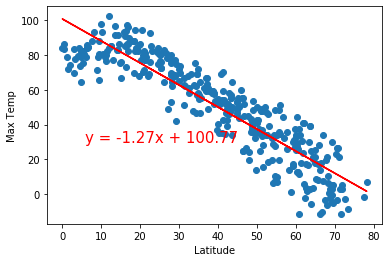

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


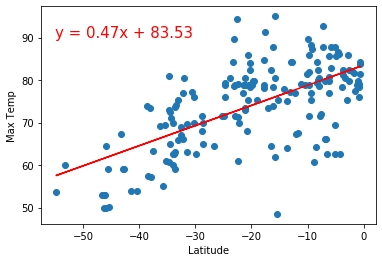

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


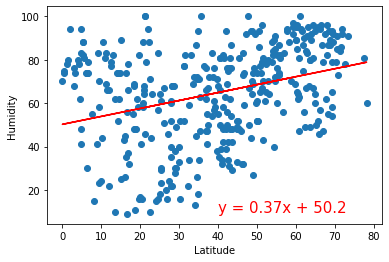

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


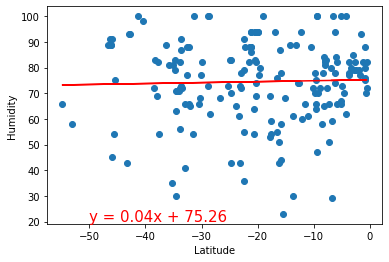

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


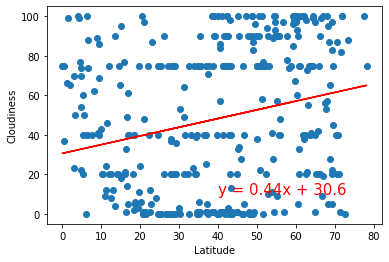

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


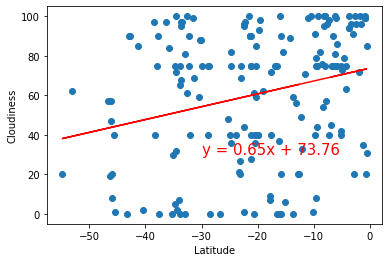

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


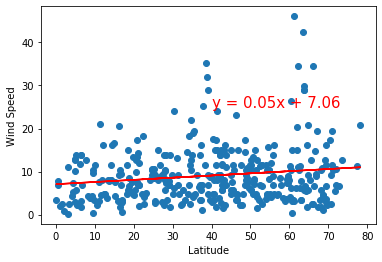

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


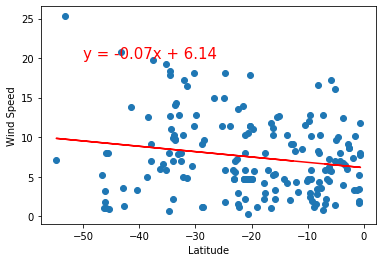